In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
#import pandas as pd
#from rasterio.crs import CRS
#from rasterio.transform import from_origin
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
import geojson
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
E_eff_inv_pre_in    = '/home/sermilik/brunt_model/d01_pre_calving/model_eff_strain_pre_calving_err5_T253_steptol_1Eneg2.tif'
E_eff_inv_calve_in  = '/home/sermilik/brunt_model/d02_calving/model_eff_strain_calving_err5_T253_steptol_1Eneg2.tif'
E_eff_inv_post_in   = '/home/sermilik/brunt_model/d03_post_calving/model_eff_strain_post_calving_err5_T253_steptol_1Eneg2.tif' 
E_eff_diag_calve_in = '/home/sermilik/brunt_model/diagnostic/model_eff_strain_diagnostic_T253_VEL_pre_GEOMETRY_calving_RIFT_calving.tif'
E_eff_diag_post_in  = '/home/sermilik/brunt_model/diagnostic/model_eff_strain_diagnostic_T253_VEL_pre_GEOMETRY_post_RIFT_post.tif'

E_eff_inv_pre_open    = rasterio.open(E_eff_inv_pre_in)
E_eff_inv_calve_open  = rasterio.open(E_eff_inv_calve_in)
E_eff_inv_post_open   = rasterio.open(E_eff_inv_post_in)
E_eff_diag_calve_open = rasterio.open(E_eff_diag_calve_in)
E_eff_diag_post_open  = rasterio.open(E_eff_diag_post_in)

E_eff_inv_pre    = E_eff_inv_pre_open.read(1)
E_eff_inv_calve  = E_eff_inv_calve_open.read(1)
E_eff_inv_post   = E_eff_inv_post_open.read(1)
E_eff_diag_calve = E_eff_diag_calve_open.read(1)
E_eff_diag_post  = E_eff_diag_post_open.read(1)


### Enhancement Factor
E_F = e/e0

In [3]:
#Enhancement factor (inverse) calving / (inverse) pre-calving
EF_inv_calve_inv_pre = E_eff_inv_calve / E_eff_inv_pre

#Enhancement factor (inverse) post-calving / (inverse) pre-calving
EF_inv_post_inv_pre = E_eff_inv_post / E_eff_inv_pre

#Enhancement factor (inverse) calving / (diagnostic) calving (rift calving (interpolated))
EF_inv_calve_diag_calve = E_eff_inv_calve / E_eff_diag_calve

#Enhancement factor (inverse) post-calving / (diagnostic) post-calving (rift post-calving (interpolated))
EF_inv_post_diag_post = E_eff_inv_post / E_eff_diag_post

In [4]:
#pre-calving Landsat-8

landsat_B2_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B2_merge_crop.tif"
landsat_B3_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B3_merge_crop.tif"
landsat_B4_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B4_merge_crop.tif"

landsat_B2_pre_merged = rasterio.open(landsat_B2_pre_out)
landsat_B3_pre_merged = rasterio.open(landsat_B3_pre_out)   
landsat_B4_pre_merged = rasterio.open(landsat_B4_pre_out)    

ls_B2_pre_merged = landsat_B2_pre_merged.read(1)
ls_B2_pre_merged[ls_B2_pre_merged > np.percentile(ls_B2_pre_merged,99)] = np.percentile(ls_B2_pre_merged,99)
ls_B3_pre_merged = landsat_B3_pre_merged.read(1)
ls_B3_pre_merged[ls_B3_pre_merged > np.percentile(ls_B3_pre_merged,99)] = np.percentile(ls_B3_pre_merged,99)   
ls_B4_pre_merged = landsat_B4_pre_merged.read(1)
ls_B4_pre_merged[ls_B4_pre_merged > np.percentile(ls_B4_pre_merged,99)] = np.percentile(ls_B4_pre_merged,99)    

ls_pre_merged = np.array([ls_B2_pre_merged, ls_B3_pre_merged, ls_B4_pre_merged]).transpose(1,2,0)
ls_pre_merged_norm = (ls_pre_merged * (255 / np.max(ls_pre_merged))).astype(np.uint8)

In [5]:
#calving Sentinel-2

sentinel_out_B2_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B2_ps_merge_crop.tif'
sentinel_out_B3_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B3_ps_merge_crop.tif'
sentinel_out_B4_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B4_ps_merge_crop.tif'
              
img1_2 = rasterio.open(sentinel_out_B2_ps)
img1_3 = rasterio.open(sentinel_out_B3_ps)
img1_4 = rasterio.open(sentinel_out_B4_ps)

#crop to 99th percentile (stops dull images)
image1_2 = img1_2.read(1)
image1_2[image1_2 > np.percentile(image1_2,99)] = np.percentile(image1_2,99)
image1_3 = img1_3.read(1)
image1_3[image1_3 > np.percentile(image1_3,99)] = np.percentile(image1_3,99)
image1_4 = img1_4.read(1)
image1_4[image1_4 > np.percentile(image1_4,99)] = np.percentile(image1_4,99)

image1 = np.array([image1_2, image1_3, image1_4]).transpose(1,2,0)
s2_calve_norm1 = (image1 * (255 / np.max(image1))).astype(np.uint8)

In [6]:
#post-calving Landsat-8

landsat_B2_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B2_merge_crop.tif"
landsat_B3_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B3_merge_crop.tif"
landsat_B4_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B4_merge_crop.tif"

landsat_B2_post_merged = rasterio.open(landsat_B2_post_out)
landsat_B3_post_merged = rasterio.open(landsat_B3_post_out)   
landsat_B4_post_merged = rasterio.open(landsat_B4_post_out)    

ls_B2_post_merged = landsat_B2_post_merged.read(1)
ls_B2_post_merged[ls_B2_post_merged > np.percentile(ls_B2_post_merged,99)] = np.percentile(ls_B2_post_merged,99)
ls_B3_post_merged = landsat_B3_post_merged.read(1)
ls_B3_post_merged[ls_B3_post_merged > np.percentile(ls_B3_post_merged,99)] = np.percentile(ls_B3_post_merged,99)   
ls_B4_post_merged = landsat_B4_post_merged.read(1)
ls_B4_post_merged[ls_B4_post_merged > np.percentile(ls_B4_post_merged,99)] = np.percentile(ls_B4_post_merged,99)    

ls_post_merged = np.array([ls_B2_post_merged, ls_B3_post_merged, ls_B4_post_merged]).transpose(1,2,0)
ls_post_merged_norm = (ls_post_merged * (255 / np.max(ls_post_merged))).astype(np.uint8)

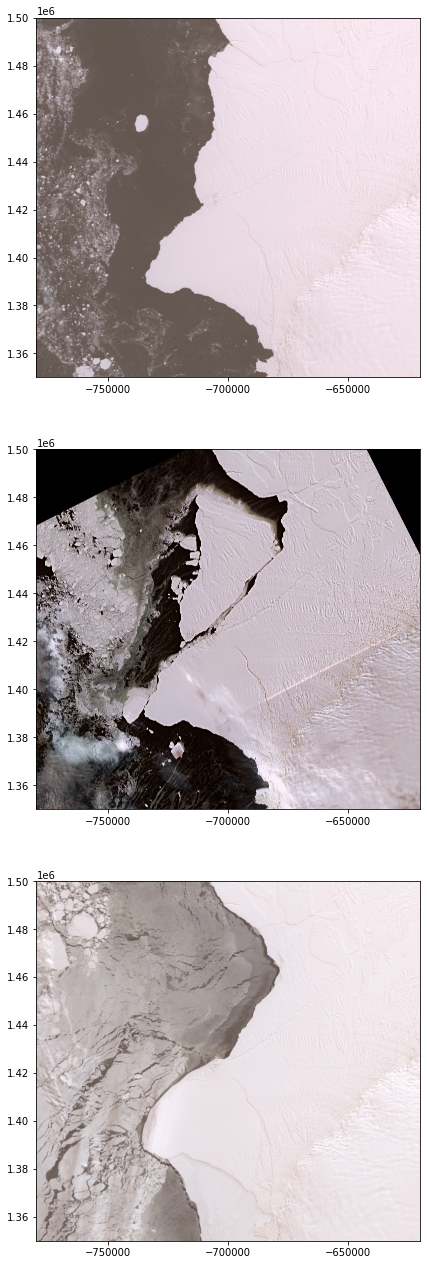

In [7]:
xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall


fig = plt.figure(figsize=(7.5, 22.5))

gs = gridspec.GridSpec(3, 1, wspace=0.1)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:1,0:1])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax1)

#--------------------------------------------------
ax2 = plt.subplot(gs[1:2,0:1])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax2)

#--------------------------------------------------
ax3 = plt.subplot(gs[2:3,0:1])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax3)

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.locator_params(axis='x', nbins=3)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.locator_params(axis='x', nbins=3)
ax3.set_xlim(xmin,xmax)
ax3.set_ylim(ymin,ymax)
ax3.locator_params(axis='x', nbins=3)


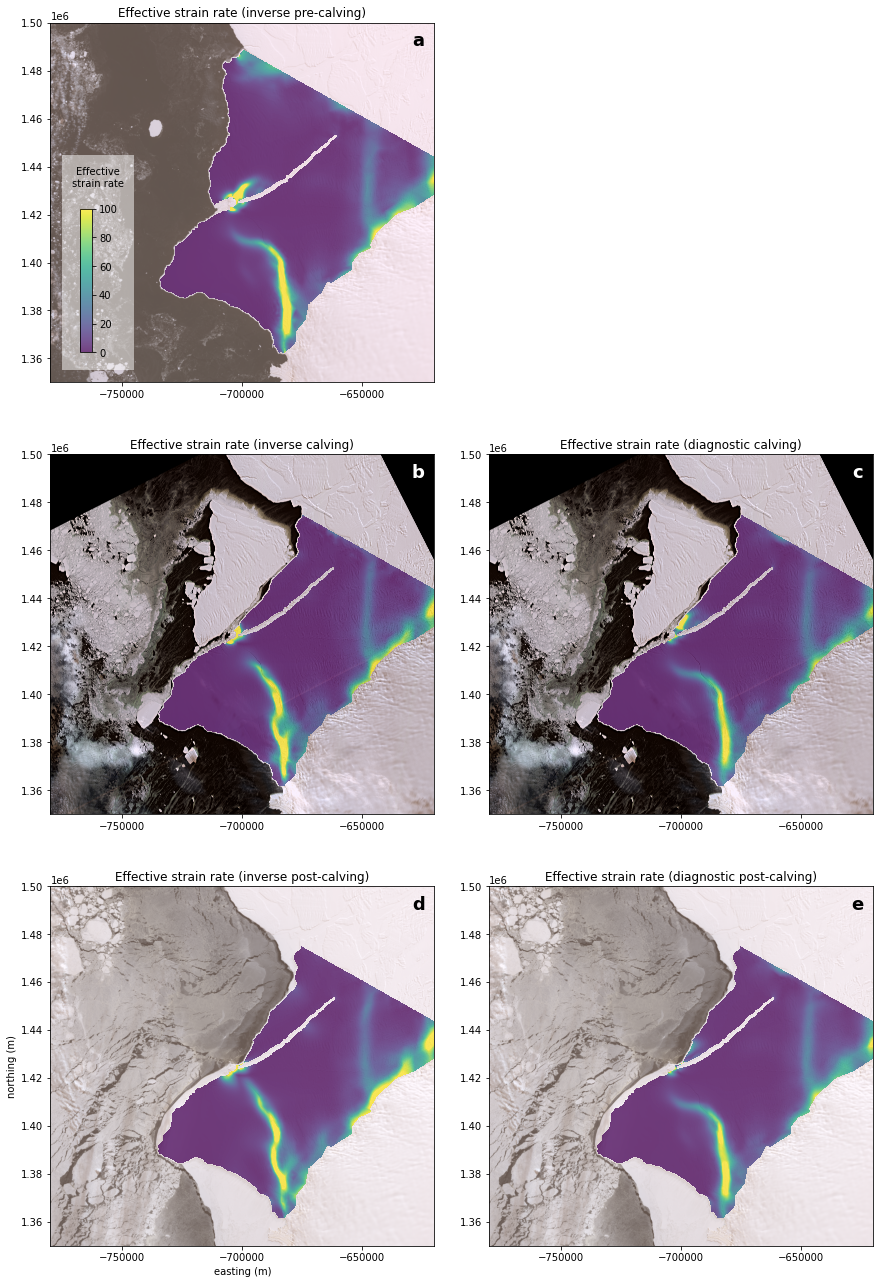

In [8]:
xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

Eeffmin = 0
Eeffmax = 100

fig = plt.figure(figsize=(15, 22.5))

gs = gridspec.GridSpec(3, 2, wspace=0.1)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:1,0:1])
hidden_Eeff = ax1.imshow(E_eff_inv_pre, alpha=0.75, vmin=Eeffmin, vmax=Eeffmax)
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax1)
show(E_eff_inv_pre,ax=ax1,transform=E_eff_inv_pre_open.transform, alpha=0.75,vmin=Eeffmin,vmax=Eeffmax)

ax1.add_patch(Rectangle((-775000,1355000),30000,90000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes1 = inset_axes(ax1, width="3%", height="40%",loc='lower left',borderpad=3)
cbar1 = plt.colorbar(hidden_Eeff,cax=cbaxes1) #, ticks=[-10,-5,0,5,10],extend='both')        
ax1.annotate("Effective\nstrain rate",(-775000+(30000/2),1440000),size=10,ha='center',va='top')

#--------------------------------------------------
ax3 = plt.subplot(gs[1:2,0:1])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax3)
show(E_eff_inv_calve,ax=ax3,transform=E_eff_inv_pre_open.transform, alpha=0.75,vmin=Eeffmin,vmax=Eeffmax)

#--------------------------------------------------
ax4 = plt.subplot(gs[1:2,1:2])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax4)
show(E_eff_diag_calve,ax=ax4,transform=E_eff_inv_pre_open.transform, alpha=0.75,vmin=Eeffmin,vmax=Eeffmax)

#--------------------------------------------------
ax5 = plt.subplot(gs[2:3,0:1])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax5)
show(E_eff_inv_post,ax=ax5,transform=E_eff_inv_pre_open.transform, alpha=0.75,vmin=Eeffmin,vmax=Eeffmax)

#--------------------------------------------------
ax6 = plt.subplot(gs[2:3,1:2])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax6)
show(E_eff_diag_post,ax=ax6,transform=E_eff_inv_pre_open.transform, alpha=0.75,vmin=Eeffmin,vmax=Eeffmax)

#--------------------------------------------------
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.locator_params(axis='x', nbins=3)
ax3.set_xlim(xmin,xmax)
ax3.set_ylim(ymin,ymax)
ax3.locator_params(axis='x', nbins=3)
ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax4.locator_params(axis='x', nbins=3)
ax5.set_xlim(xmin,xmax)
ax5.set_ylim(ymin,ymax)
ax5.locator_params(axis='x', nbins=3)
ax6.set_xlim(xmin,xmax)
ax6.set_ylim(ymin,ymax)
ax6.locator_params(axis='x', nbins=3)

ax1.annotate('a',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax3.annotate('b',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax4.annotate('c',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax5.annotate('d',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax6.annotate('e',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title('Effective strain rate (inverse pre-calving)')
ax3.set_title('Effective strain rate (inverse calving)')
ax4.set_title('Effective strain rate (diagnostic calving)')
ax5.set_title('Effective strain rate (inverse post-calving)')
ax6.set_title('Effective strain rate (diagnostic post-calving)')

ax5.set_xlabel('easting (m)')
ax5.set_ylabel('northing (m)')

output = 'fig07_eff_stain_rate.png'
#plt.savefig(output, dpi=300, bbox_inches='tight')

plt.show()



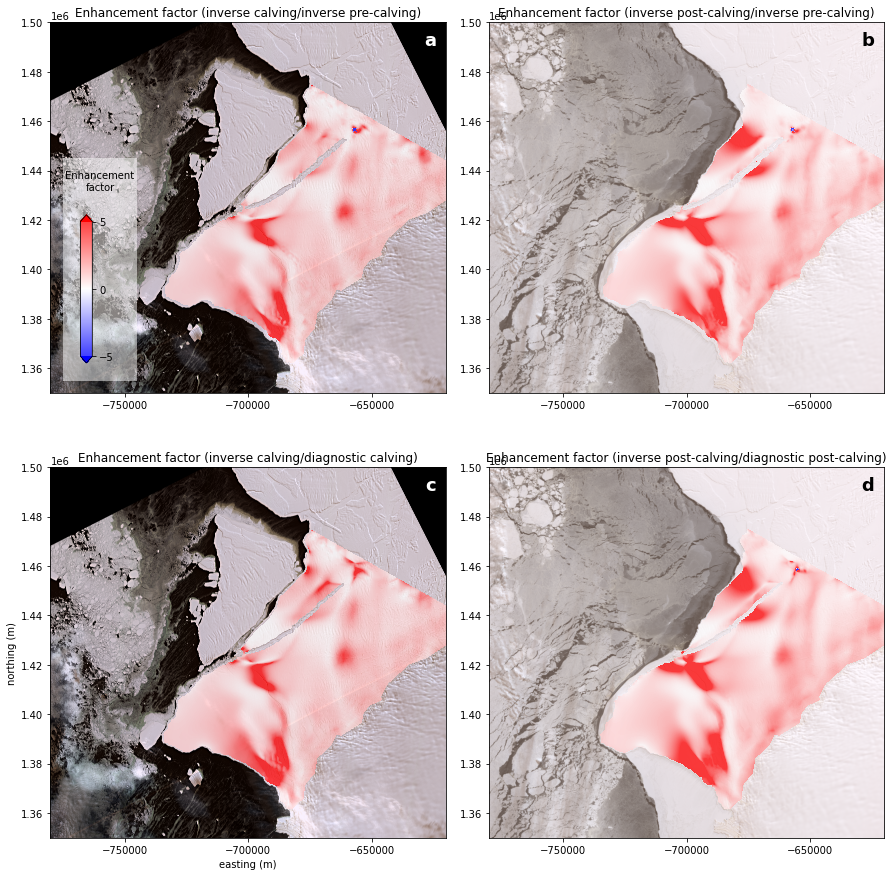

In [9]:
xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

EFmin = -5
EFmax = 5

fig = plt.figure(figsize=(15, 15))

gs = gridspec.GridSpec(2, 2, wspace=0.1)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:1,0:1])
hidden_EF = ax1.imshow(EF_inv_calve_inv_pre, cmap="bwr", alpha=0.75, vmin=EFmin, vmax=EFmax)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax1)
show(EF_inv_calve_inv_pre,ax=ax1,transform=E_eff_inv_pre_open.transform, cmap="bwr", alpha=0.75,vmin=EFmin,vmax=EFmax)

ax1.add_patch(Rectangle((-775000,1355000),30000,90000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes1 = inset_axes(ax1, width="3%", height="40%",loc='lower left',borderpad=3)
cbar1 = plt.colorbar(hidden_EF,cax=cbaxes1, ticks=[-10,-5,0,5,10],extend='both')        
ax1.annotate("Enhancement\nfactor",(-775000+(30000/2),1440000),size=10,ha='center',va='top')

#--------------------------------------------------
ax2 = plt.subplot(gs[0:1,1:2])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax2)
show(EF_inv_post_inv_pre,ax=ax2,transform=E_eff_inv_pre_open.transform, cmap="bwr",alpha=0.75,vmin=EFmin,vmax=EFmax)

#--------------------------------------------------
ax3 = plt.subplot(gs[1:2,0:1])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax3)
show(EF_inv_calve_diag_calve,ax=ax3,transform=E_eff_inv_pre_open.transform, cmap="bwr",alpha=0.75,vmin=EFmin,vmax=EFmax)

#--------------------------------------------------
ax4 = plt.subplot(gs[1:2,1:2])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax4)
show(EF_inv_post_diag_post,ax=ax4,transform=E_eff_inv_pre_open.transform, cmap="bwr",alpha=0.75,vmin=EFmin,vmax=EFmax)

#--------------------------------------------------
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.locator_params(axis='x', nbins=3)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.locator_params(axis='x', nbins=3)
ax3.set_xlim(xmin,xmax)
ax3.set_ylim(ymin,ymax)
ax3.locator_params(axis='x', nbins=3)
ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax4.locator_params(axis='x', nbins=3)

ax1.annotate('a',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax2.annotate('b',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax3.annotate('c',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax4.annotate('d',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title('Enhancement factor (inverse calving/inverse pre-calving)')
ax2.set_title('Enhancement factor (inverse post-calving/inverse pre-calving)')
ax3.set_title('Enhancement factor (inverse calving/diagnostic calving)')
ax4.set_title('Enhancement factor (inverse post-calving/diagnostic post-calving)')

ax3.set_xlabel('easting (m)')
ax3.set_ylabel('northing (m)')

output = 'fig07_enhancement_factor.png'
#plt.savefig(output, dpi=300, bbox_inches='tight')

plt.show()
